# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# Student Poverty FRPM Data
`cde.ca.gov-frpm-1.2.1` Last Update: 2021-03-10T18:29:18

_Data files pertaining to students eligible for Free or Reduced Price Meals (FRPM)._


## Documentation Links

* [Homepage](https://www.cde.ca.gov/ds/sd/sd/filessp.asp) Dataset home page

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [frp_meals](data/frp_meals.csv)**. Combined data, 2004 to 2018

## References
<ul><li> <strong>frpm_source</string>, <em>index:cde.ca.gov-frpm-source</em>. </li><li> <strong>colmap</string>, <em>data/column-map.csv</em>. </li><ul>

In [3]:
resource_name='frp_meals'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
county_code,integer,A unique two-digit code corresponding to the county.
district_code,integer,A unique five-digit code corresponding to the district.
school_code,integer,A unique seven-digit code corresponding to the school.
charter_school_number,integer,A four character value (any combination of numbers and letters) assigned to a charter school. A blank value indicates the school is not a charter school.
charter_funding_type,string,"Indicates the charter school funding type. Values are as follows: Locally funded, Directly funded, Not in Charter School funding model, or Blank."
lea_name,string,Local educational agency (LEA) name.
school_name,text,
low_grade,string,
high_grade,integer,
enrollment,integer,A total count of students ages 5-17 enrolled (primary or short-term) on Census Day (the first Wednesday in October). These data were submitted to CALPADS as part of the annual Fall 1 submission.


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,county_code,district_code,school_code,charter_school_number,charter_funding_type,lea_name,school_name,low_grade,high_grade,enrollment,...,unadjusted_free_meal_count,unadjusted_frpm_count,frpm_count,calpads_fall_1_certification_status,district_type,school_type,educational_option_type,nslp_provision_status,charter_school_y_n,irc
0,1,10017,112607,811.0,Directly funded,Alameda County Office of Education,Envision Academy for Arts & Technology,9,12.0,370,...,NaN,NaN,291,Y,County Office of Education (COE),High Schools (Public),Traditional,NaN,Yes,Y
1,1,10017,123968,1284.0,Directly funded,Alameda County Office of Education,Community School for Creative Education,K,8.0,224,...,NaN,NaN,115,Y,County Office of Education (COE),Elementary Schools (Public),Traditional,NaN,Yes,Y
2,1,10017,124172,1296.0,Directly funded,Alameda County Office of Education,Yu Ming Charter,K,8.0,445,...,NaN,NaN,64,Y,County Office of Education (COE),Elementary Schools (Public),Traditional,NaN,Yes,Y
3,1,10017,125567,1383.0,Directly funded,Alameda County Office of Education,Urban Montessori Charter,K,8.0,418,...,NaN,NaN,129,Y,County Office of Education (COE),Elementary Schools (Public),Traditional,NaN,Yes,Y
4,1,10017,130401,NaN,NaN,Alameda County Office of Education,Alameda County Juvenile Hall/Court,K,12.0,50,...,NaN,NaN,50,Y,County Office of Education (COE),Juvenile Court Schools,Juvenile Court School,NaN,No,N


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,11
const,2
datetime,0
number,15
other,11


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0
academic_year,2018-2019
calpads_fall_1_certification_status,Y


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

,0
reduced_price_meals,NaN
total_frpm,NaN
data_source_for_frpm,NaN
provision_2_or_3_school_y_n,NaN
data_source_for_provision_2_or_3_school,NaN
frpm_total_unduplicated_count_k_12,NaN
nslp_provision_2_or_3_school,NaN
unadjusted_free_meal_count_k_12,NaN
unadjusted_frpm_count_k_12,NaN
unadjusted_free_meal_count,NaN


# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county_code                 10520 non-null  int64  
 1   district_code               10520 non-null  int64  
 2   school_code                 10520 non-null  int64  
 3   charter_school_number       1296 non-null   float64
 4   high_grade                  10040 non-null  float64
 5   enrollment                  10520 non-null  int64  
 6   free_meal_count             10520 non-null  int64  
 7   percent_frpm                10520 non-null  float64
 8   free_meal_count_k_12        10520 non-null  int64  
 9   percent_eligible_free_k_12  10520 non-null  float64
 10  percent_eligible_frpm_k_12  10520 non-null  float64
 11  calpads_enrollment          10520 non-null  int64  
 12  percent_eligible_free       10520 non-null  float64
 13  frpm_count_k_12             105

None

,count,mean,std,min,25%,50%,75%,max
county_code,10520.0,2.865741e+01,1.407982e+01,1.0,19.000000,3.000000e+01,3.700000e+01,58.0
district_code,10520.0,6.552726e+04,1.140972e+04,10017.0,64733.000000,6.708200e+04,6.962500e+04,77222.0
school_code,10520.0,4.062103e+06,2.609779e+06,0.0,138022.000000,6.013932e+06,6.049698e+06,9010745.0
charter_school_number,1296.0,1.128567e+03,5.836487e+02,1.0,652.250000,1.183500e+03,1.646250e+03,2023.0
high_grade,10040.0,7.788446e+00,2.805951e+00,1.0,5.000000,8.000000e+00,1.200000e+01,13.0
enrollment,10520.0,5.724510e+02,5.256659e+02,0.0,253.000000,4.830000e+02,7.090000e+02,6199.0
free_meal_count,10520.0,2.990550e+02,3.037669e+02,0.0,79.000000,2.260000e+02,4.240000e+02,3772.0
percent_frpm,10520.0,6.120592e-01,2.840423e-01,0.0,0.383903,6.787686e-01,8.604405e-01,1.0
free_meal_count_k_12,10520.0,3.076378e+02,3.125680e+02,0.0,83.750000,2.320000e+02,4.330000e+02,3863.0
percent_eligible_free_k_12,10520.0,5.464391e-01,2.681890e-01,0.0,0.322894,5.855909e-01,7.767457e-01,1.0


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

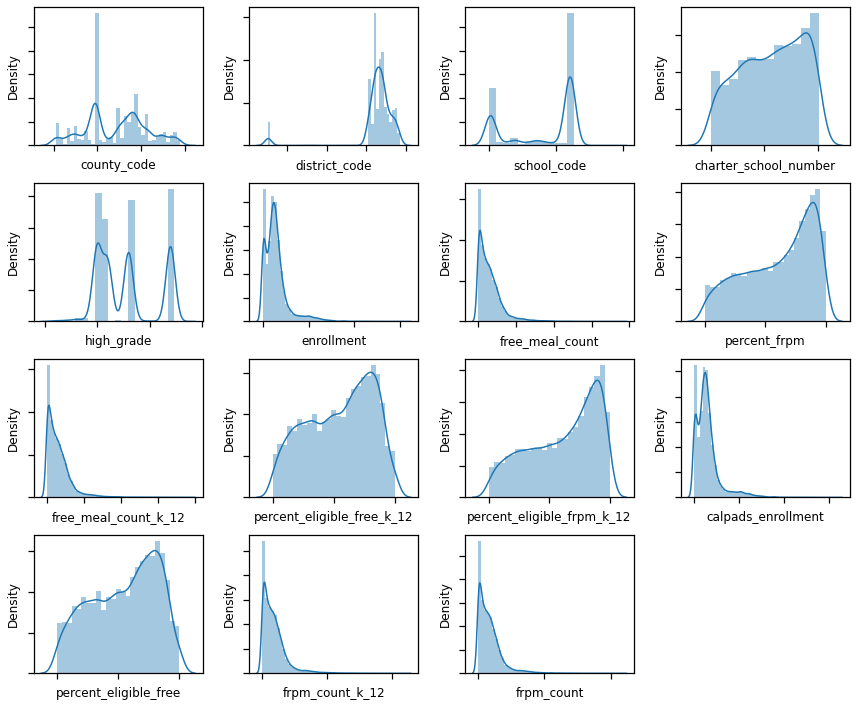

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: 

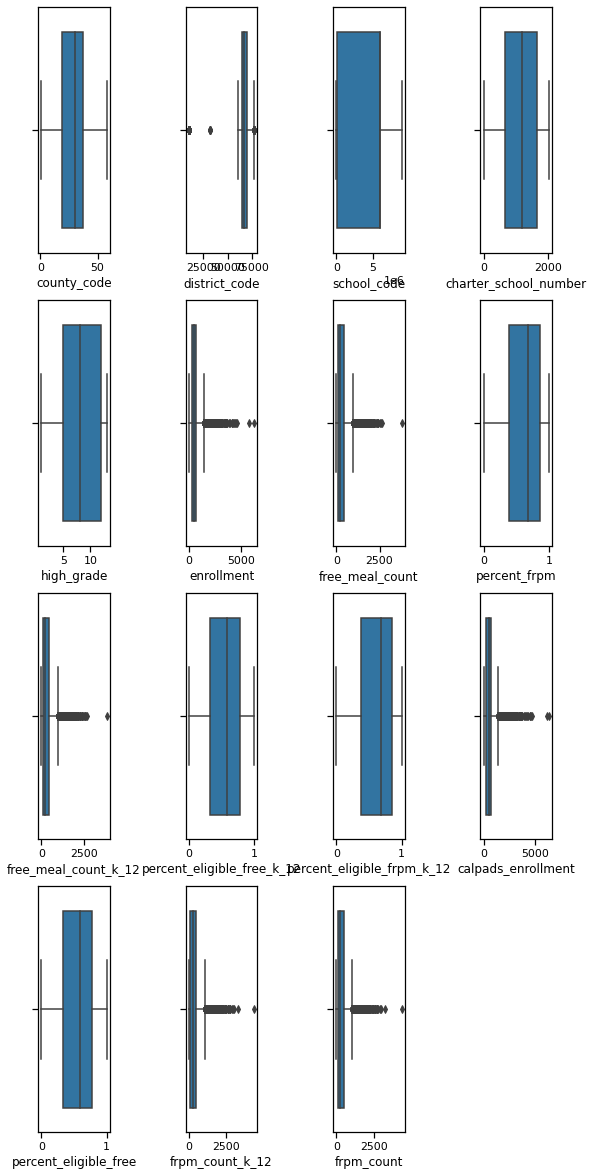

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

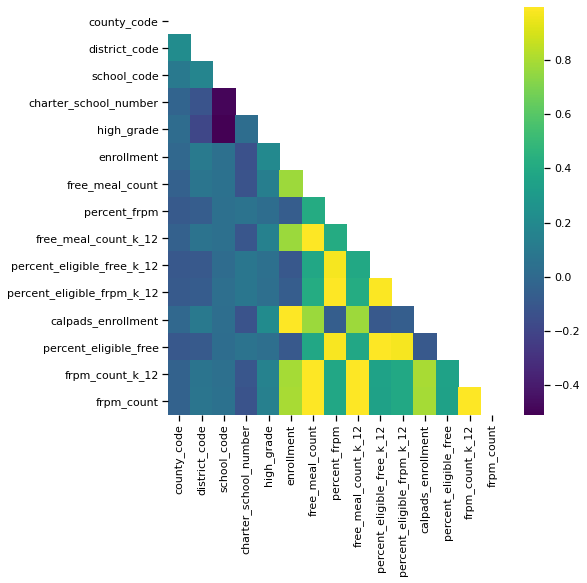

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   charter_funding_type     1313 non-null   object
 1   lea_name                 10520 non-null  object
 2   school_name              10520 non-null  object
 3   low_grade                10130 non-null  object
 4   county_name              10520 non-null  object
 5   district_type            10520 non-null  object
 6   school_type              10070 non-null  object
 7   educational_option_type  10070 non-null  object
 8   nslp_provision_status    3209 non-null   object
 9   charter_school_y_n       10070 non-null  object
 10  irc                      10070 non-null  object
dtypes: object(11)
memory usage: 904.2+ KB


None

,count,unique,top,freq
charter_funding_type,1313,2,Directly funded,994
lea_name,10520,1022,Los Angeles Unified,1009
school_name,10520,8791,"Nonpublic, Nonsectarian Schools",390
low_grade,10130,15,K,6076
county_name,10520,58,Los Angeles,2311
district_type,10520,8,Unified School District,6970
school_type,10070,17,Elementary Schools (Public),5659
educational_option_type,10070,12,Traditional,8921
nslp_provision_status,3209,6,CEP,2564
charter_school_y_n,10070,3,No,8738


# Nulls


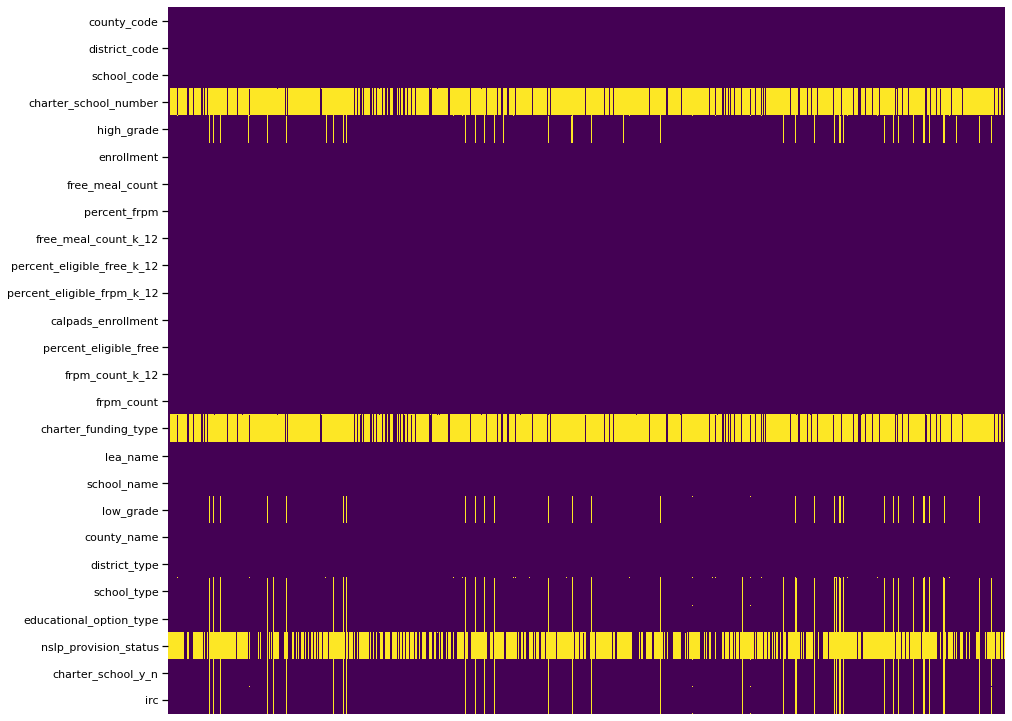

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )